# 시설 별 시각화

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (44.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

In [ ]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import json

import folium
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
# 행정동 경계 데이터 불러오기
base = json.load(open('/content/HangJeongDong_ver20230701.geojson',encoding='utf-8'))
base_yj = {'type':'FeatureCollection',
           'name':'123',
           'crs':base['crs'],
           'features':[ b for b in base['features'] if b['properties']['sggnm']=='영주시'] }
for i in range(len(base_yj['features'])):
  base_yj['features'][i]['id'] = base_yj['features'][i]['properties']['temp']
base_yj

{'type': 'FeatureCollection',
 'name': '123',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'adm_nm': '경상북도 영주시 풍기읍',
    'adm_cd': '3706011',
    'adm_cd2': '4721025000',
    'sgg': '47210',
    'sido': '47',
    'sidonm': '경상북도',
    'temp': '영주시 풍기읍',
    'sggnm': '영주시',
    'adm_cd8': '37060110'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[128.4849627800936, 36.95746230422018],
       [128.48508112795824, 36.95743834813937],
       [128.48627164636372, 36.95713626895042],
       [128.48645031034764, 36.95703168847365],
       [128.48663232168607, 36.9569145349624],
       [128.48699794977384, 36.95664148188463],
       [128.48801719341245, 36.95579184974343],
       [128.48814294189313, 36.955674534686224],
       [128.48820437179074, 36.955590817699566],
       [128.4893345502246, 36.95426635240257],
       [128.4904436966358, 36.95317586640594],
       [128.4909368719500

In [ ]:
# 전처리 완료된 주요 시설 데이터 불러오기, geojson으로 변형
data = pd.read_csv('/content/data_final.csv',index_col=0,encoding='cp949')

geojson = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [data.iloc[i,:]['y'], data.iloc[i,:]["x"]],
            },
        "properties" : dict(data.iloc[i,:]),
     } for i in range(len(data))]
}

data

,명칭,x,y,시설명
0,(구)읍사무소,36.870388,128.524575,버스정류장
1,SK주유소앞,36.832176,128.638726,버스정류장
2,가천,36.801315,128.589752,버스정류장
3,가흥동,36.813366,128.606163,버스정류장
4,가흥동,36.823266,128.605155,버스정류장
...,...,...,...,...
33,가흥2동 공영주차장,36.830427,128.609702,공영주차장
34,풍기읍 공영주차장,36.868436,128.532638,공영주차장
35,풍기읍 중앙시장 주차장,36.869883,128.528241,공영주차장
36,풍기읍 문화광장 주차장,36.872151,128.522131,공영주차장


In [ ]:
data['시설명'].unique()

array(['버스정류장', '문화재', '농촌관광시설', '영주맛집', '마을회관', '경로당', '노인복지시설', '공동주택',
       '다중이용시설', '공영주차장'], dtype=object)

In [ ]:
# 시각화 위한 지도 기준점 설정
lon = data['x'].mean()
lat = data['y'].mean()
m = folium.Map([lon,lat],tiles='cartodb dark_matter',zoom_start=11)


# 행정동 경계 표시
folium.GeoJson(base_yj,
    style_function = lambda feature: {'color':'white',
                      'opacity' : 0.7,
                      'weight' : 1,
                      'fillOpacity' : 0.2,
                      'dashArray' : '5, 5'}).add_to(m)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

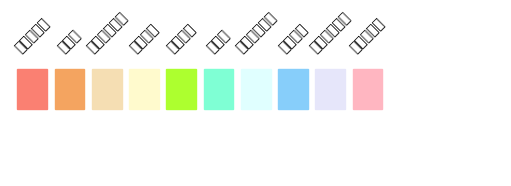

<Figure size 640x480 with 0 Axes>

In [ ]:
# 각 시설명 별 색상 할당
colors = ['salmon',
          'sandybrown',
          'wheat',
          'lemonchiffon',
          'greenyellow',
          'aquamarine',
          'lightcyan',
          'lightskyblue',
          'lavender',
          'lightpink']
color_dic = {}
i = 0
for l in data['시설명'].unique():
  color_dic[l] = colors[i]
  i += 1
color_dic

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] =False

fig, ax = plt.subplots(figsize=(5,1.75), layout='constrained')
for i in range(10):
  ax.add_patch(patches.Rectangle((i,0),0.8,0.6,color=colors[i]))
  ax.text(i+0.4, 0.85, list(color_dic.keys())[i], ha='center', rotation=45)
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.axis('off')
plt.show()

plt.savefig('./범례.png')

In [ ]:
for _, row in data.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 5,
         popup=row['시설명'],
         tooltip=row['시설명'],
         fill=color_dic[row['시설명']],
         color=color_dic[row['시설명']]
  ).add_to(m)
m
m.save('map_시설전체.html')

In [ ]:
# 각 시설별 지도 시각화
for s in data['시설명'].unique():

  globals()['m_{}'.format(s)] = folium.Map([lon,lat],tiles='cartodb dark_matter',zoom_start=11)

  folium.GeoJson(base_yj,
    style_function = lambda feature: {'color':'white',
                      'opacity' : 0.7,
                      'weight' : 1,
                      'fillOpacity' : 0.2,
                      'dashArray' : '5, 5'}).add_to(globals()['m_{}'.format(s)])

  for _, row in data[data['시설명']==s].iterrows():
    folium.Circle(location = [row['x'],row['y']],
          radius = 5,
          popup=row['시설명'],
          tooltip=row['시설명'],
          fill=color_dic[row['시설명']],
          color=color_dic[row['시설명']]
    ).add_to(globals()['m_{}'.format(s)])

In [ ]:
# html 저장
for s in data['시설명'].unique():
  globals()['m_{}'.format(s)].save('map_{}.html'.format(s))

# 연령별 월간 인구

In [ ]:
pop = pd.read_csv('/content/202403_202403_연령별인구현황_월간 (1).csv',encoding='cp949')
pop = pop[['행정구역','2024년03월_계_총인구수']]
pop['행정구역'] = [ '영주시 '+a[2].split('(')[0] for a in pop['행정구역'].str.split(' ') ]
pop['2024년03월_계_총인구수'] = [ a[0]+a[1] for a in pop['2024년03월_계_총인구수'].str.split(',') ]
pop['2024년03월_계_총인구수'] = pop['2024년03월_계_총인구수'].astype(int)
pop = pop.iloc[1:,:]

pop_dict = pop.set_index('행정구역')['2024년03월_계_총인구수']

In [ ]:
pop_dict

행정구역
영주시 풍기읍     10580
영주시 이산면      2195
영주시 평은면      1401
영주시 문수면      1909
영주시 장수면      2056
영주시 안정면      2837
영주시 봉현면      2551
영주시 순흥면      1899
영주시 단산면      1754
영주시 부석면      2846
영주시 상망동      7174
영주시 하망동      5854
영주시 영주1동     3603
영주시 영주2동     4584
영주시 휴천1동     6246
영주시 휴천2동     9698
영주시 휴천3동     7229
영주시 가흥1동    15408
영주시 가흥2동    10248
Name: 2024년03월_계_총인구수, dtype: int64

In [ ]:
base_yj['features'][0]['id']

'영주시 풍기읍'

In [ ]:
import branca.colormap as cm
linear = cm.linear.YlOrBr_04.scale(1000,20000)
m_pop = folium.Map([lon,lat],tiles="Cartodb Positron",zoom_start=11)
folium.GeoJson(base_yj,
               style_function=lambda feature: {
                   'fillColor': linear(pop_dict[feature['id']]),
                   'color':'black',
                   'weight':2,
                   'dashArray':'5, 5',
                   'fillOpacity':0.8,
                   'opacity':1
               }).add_to(m_pop)
linear.caption = 'population'
m_pop.add_child(linear)
m_pop.save('map_인구.html')

In [ ]:
linear

In [ ]:
for _, row in data.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 5,
         popup=row['시설명'],
         tooltip=row['시설명'],
         fill=color_dic[row['시설명']],
         color=color_dic[row['시설명']]
  ).add_to(m_pop)
  m_pop

In [ ]:
  m_pop.save('map_인구+시설.html')

# 입지분석 시각화

In [ ]:
# 파일 불러오기
# MCLP
mclp = pd.read_csv('/content/mclp_result10.csv',encoding='cp949',index_col=0)

# P-median
p_median = pd.read_csv('/content/P-MEDIAN.csv')
p_median.drop([2], axis=0, inplace=True)
p_median

,Location Latitude Longitude cluster
0,4 경상북도 영주시 부석면 상석리 36.943767 128.648941 ...
1,5 경상북도 영주시 평은면 용혈리 36.733177 128.644719 ...
3,9 경상북도 영주시 이산면 원리 36.821884 128.659201 ...
4,10 경상북도 영주시 순흥면 태장리 36.933759 128.518073...
5,11 경상북도 영주시 평은면 오운리 36.740764 128.705798...
6,14 경상북도 영주시 하망동 36.826099 128.628848 클...
7,19 경상북도 영주시 풍기읍 창락리 36.883470 128.478994...


In [ ]:
# p_median 전처리

x = [ float(x[2].strip()) for x in p_median['Location   Latitude   Longitude   cluster'].str.split('  ') ]
y = [ float(x[3].strip()) for x in p_median['Location   Latitude   Longitude   cluster'].str.split('  ') ]
addr = [ x[1].strip() for x in p_median['Location   Latitude   Longitude   cluster'].str.split('  ') ]

p_median['x'] = x
p_median['y'] = y
p_median['주소'] = addr

In [ ]:
# MCLP 시각화
m_mclp = folium.Map([lon,lat],tiles='cartodb dark_matter',zoom_start=11)

# 행정동 경계 표시
folium.GeoJson(base_yj,
               style_function = lambda feature: {'color':'white',
                                                 'opacity' : 0.7,
                                                  'weight' : 1,
                                                  'fillOpacity' : 0.2,
                                                  'dashArray' : '5, 5'}).add_to(m_mclp)
# 입지분석 결과 표시
for _, row in mclp.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 500,
         weight = 1,
         popup=row['명칭'],
         tooltip=row['명칭'],
         fill='skyblue',
         color='skyblue',
         fillOpacity = 0.5
  ).add_to(m_mclp)
  folium.Circle(location = [row['x'],row['y']],
         radius = 10,
         weight = 1,
         fill='white',
         color='white',
         fillOpacity = 1
  ).add_to(m_mclp)

m_mclp

In [ ]:
# p median 시각화
m_pmedian = folium.Map([lon,lat],tiles='cartodb dark_matter',zoom_start=11)

# 행정동 경계 표시
folium.GeoJson(base_yj,
               style_function = lambda feature: {'color':'white',
                                                 'opacity' : 0.7,
                                                  'weight' : 1,
                                                  'fillOpacity' : 0.2,
                                                  'dashArray' : '5, 5'}).add_to(m_pmedian)
# 입지분석 결과 표시
for _, row in p_median.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 2000,
         weight = 1,
         popup=row['주소'],
         tooltip=row['주소'],
         fill='pink',
         color='pink',
         fillOpacity = 0.5
  ).add_to(m_pmedian)
  folium.Circle(location = [row['x'],row['y']],
         radius = 10,
         weight = 1,
         fill='white',
         color='white',
         fillOpacity = 1
  ).add_to(m_pmedian)

m_pmedian

In [ ]:
# 저장
m_pmedian.save('./map_p-median.html')
m_mclp.save('./map_mclp.html')

In [ ]:
# 각 결과에 관광 시설 추가
for map in [m_pmedian,m_mclp]:
  for s in ['문화재','농촌관광시설']:
    for _, row in data[data['시설명']==s].iterrows():
      folium.Circle(location = [row['x'],row['y']],
            radius = 5,
            popup=row['시설명'],
            tooltip=row['시설명'],
            fill=color_dic[row['시설명']],
            color=color_dic[row['시설명']]
      ).add_to(map)

In [ ]:
m_pmedian.save('./map_p-median+관광시설_2.5km.html')
m_mclp.save('./map_mclp+관광시설_2.5km.html')

In [ ]:
m_pmedian

In [ ]:
m_concat = folium.Map([lon,lat],tiles='cartodb dark_matter',zoom_start=11)

# 행정동 경계 표시
folium.GeoJson(base_yj,
               style_function = lambda feature: {'color':'white',
                                                 'opacity' : 0.7,
                                                  'weight' : 1,
                                                  'fillOpacity' : 0.2,
                                                  'dashArray' : '5, 5'}).add_to(m_concat)
# 입지분석 결과 표시
for _, row in p_median.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 2000,
         weight = 1,
         popup=row['주소'],
         tooltip=row['주소'],
         fill='pink',
         color='pink',
         fillOpacity = 0.5
  ).add_to(m_concat)
  folium.Circle(location = [row['x'],row['y']],
         radius = 10,
         weight = 1,
         fill='white',
         color='white',
         fillOpacity = 1
  ).add_to(m_concat)

# 입지분석 결과 표시
for _, row in mclp.iterrows():
  folium.Circle(location = [row['x'],row['y']],
         radius = 2000,
         weight = 1,
         popup=row['명칭'],
         tooltip=row['명칭'],
         fill='skyblue',
         color='skyblue',
         fillOpacity = 0.5
  ).add_to(m_concat)
  folium.Circle(location = [row['x'],row['y']],
         radius = 10,
         weight = 1,
         fill='white',
         color='white',
         fillOpacity = 1
  ).add_to(m_concat)

for s in ['문화재','농촌관광시설']:
    for _, row in data[data['시설명']==s].iterrows():
      folium.Circle(location = [row['x'],row['y']],
            radius = 5,
            popup=row['시설명'],
            tooltip=row['시설명'],
            fill=color_dic[row['시설명']],
            color=color_dic[row['시설명']]
      ).add_to(m_concat)

m_concat

In [ ]:
m_concat.save('./map_mclp(skyblue)+pmedian(pink)+관광시설.html')